# Exercise 6.5 Unsupervised Machine Learning: Clustering

This script contains the following:
1. Important libraries, dat and renaming columns 
2. The elbow technique
3. K-means clustering

# 1. Importing libraries, data and renaming columns 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler # For standardizing features, we will use StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
#This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
path = r"C:\Users\klein\Achievement 6 Project- Advanced Analytics & Dashboard Design"

In [4]:
#Importing players data
fifa_21 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'fifa_21_ratinglevel.csv'), index_col = False)

In [5]:
fifa_21.head()

,Unnamed: 0,sofifa_id,age,height_cm,weight_kg,nationality,league_rank,player_rating,potential,value_eur,wage_eur,player_positions,preferred_foot,work_rate,international_reputation,Rating Level
0,0,158023,33,170,72,Argentina,1.0,93,93,67500000,560000,"RW, ST, CF",Left,Medium/Low,5,High rating
1,1,20801,35,187,83,Portugal,1.0,92,92,46000000,220000,"ST, LW",Right,High/Low,5,High rating
2,2,200389,27,188,87,Slovenia,1.0,91,93,75000000,125000,GK,Right,Medium/Medium,3,High rating
3,3,188545,31,184,80,Poland,1.0,91,91,80000000,240000,ST,Right,High/Medium,4,High rating
4,4,190871,28,175,68,Brazil,1.0,91,91,90000000,270000,"LW, CAM",Right,High/Medium,5,High rating


Data cleaning

In [6]:
fifa_21.columns

Index(['Unnamed: 0', 'sofifa_id', 'age', 'height_cm', 'weight_kg',
       'nationality', 'league_rank', 'player_rating', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot', 'work_rate',
       'international_reputation', 'Rating Level'],
      dtype='object')

In [7]:
#Dropping the categorical and unneded columns
fifa_21_new = fifa_21 [['sofifa_id', 'age', 'height_cm', 'weight_kg', 'player_rating', 'potential', 'value_eur', 'wage_eur']]

In [8]:
fifa_21_new.shape

(18719, 8)

In [9]:
#Renaming the columns

fifa_21_new.rename(columns = {'sofifa_id' : 'Player ID', 'value_eur' : 'Market Value Eur', 'wage_eur' : 'Wages'}, inplace = True)

C:\Users\klein\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
fifa_21_new.head()

,Player ID,age,height_cm,weight_kg,player_rating,potential,Market Value Eur,Wages
0,158023,33,170,72,93,93,67500000,560000
1,20801,35,187,83,92,92,46000000,220000
2,200389,27,188,87,91,93,75000000,125000
3,188545,31,184,80,91,91,80000000,240000
4,190871,28,175,68,91,91,90000000,270000


# standardize data

In [11]:
scaler = StandardScaler()

In [12]:
fifa_21_std = scaler.fit_transform(fifa_21_new)

In [13]:
fifa_21_std

array([[-2.50760295,  1.67067701, -1.64099567, ...,  3.58449045,
        12.72629844, 27.911483  ],
       [-7.55398312,  2.09783926,  0.8520107 , ...,  3.42089207,
         8.53285877, 10.69529609],
       [-0.94958061,  0.38919025,  0.99865813, ...,  3.58449045,
        14.18912623,  5.88489093],
       ...,
       [ 0.91124955, -1.10587764,  0.55871583, ..., -3.28664159,
        -0.43232515, -0.39395371],
       [ 1.15793826, -0.46513426,  0.70536327, ..., -3.28664159,
        -0.43134993, -0.39395371],
       [ 1.16672756,  0.60277137,  0.55871583, ..., -3.94103512,
        -0.43330037, -0.34331787]])

# The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(fifa_21_std).score(fifa_21_std) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

In [16]:
score

[-149752.00000000038,
 -116339.06118550486,
 -94155.43451368007,
 -82051.12390746546,
 -71058.51549981121,
 -64395.38916316886,
 -59303.61455834461,
 -55644.60812012763,
 -52488.29381168525]

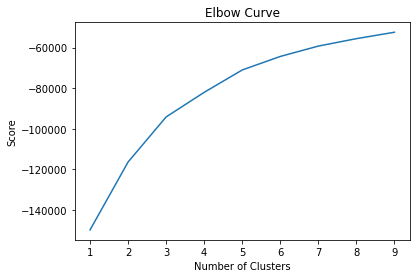

In [17]:
# Plot the elbow curve using Pylab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I can see at least 3 breaking point on the curve. Along the x axis, it jumps from 2 to 4 then from 4 to 5 and it slightly
rises after 5.

# 4. k-means clustering

In [18]:
# create the k-means object

kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [19]:
#Fit the k-means object to the data
kmeans.fit(fifa_21_std)

C:\Users\klein\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [20]:
fifa_21_new['clusters'] = kmeans.fit_predict(fifa_21_std)

C:\Users\klein\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\klein\AppData\Local\Temp/ipykernel_3096/866570988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_21_new['clusters'] = kmeans.fit_predict(fifa_21_std)


In [21]:
fifa_21_new.head()

,Player ID,age,height_cm,weight_kg,player_rating,potential,Market Value Eur,Wages,clusters
0,158023,33,170,72,93,93,67500000,560000,3
1,20801,35,187,83,92,92,46000000,220000,3
2,200389,27,188,87,91,93,75000000,125000,3
3,188545,31,184,80,91,91,80000000,240000,3
4,190871,28,175,68,91,91,90000000,270000,3


In [22]:
fifa_21_new['clusters'].value_counts()

0    6270
2    5553
1    5442
3    1454
Name: clusters, dtype: int64

NameError: name 'ticker' is not defined

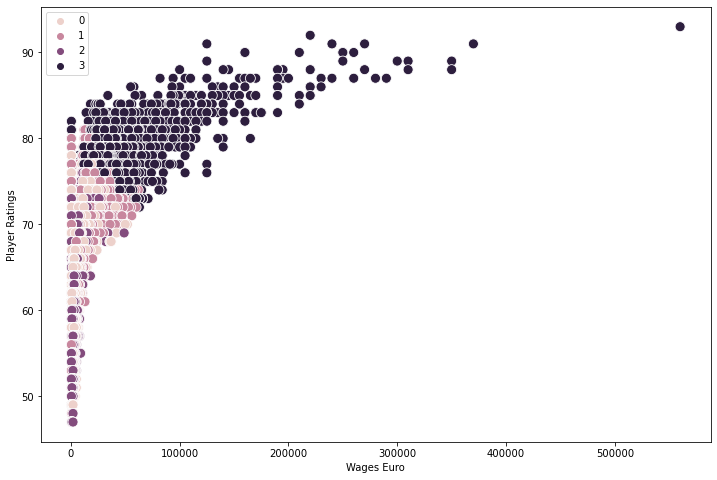

In [26]:
#Plot the clusters for the "player_rating" and "Wages" variable
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=fifa_21_new['Wages'], y=fifa_21_new['player_rating'], hue=kmeans.labels_, s=100)

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Wages Euro') # Label x-axis.
plt.ylabel('Player Ratings') # Label y-axis
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

There are more purple cluser(coded 1) players that receivesd wages below 100,000 only the black cluster(coded3) players receive wages over 100,000 they also receive the highest ratings. 

NameError: name 'ticker' is not defined

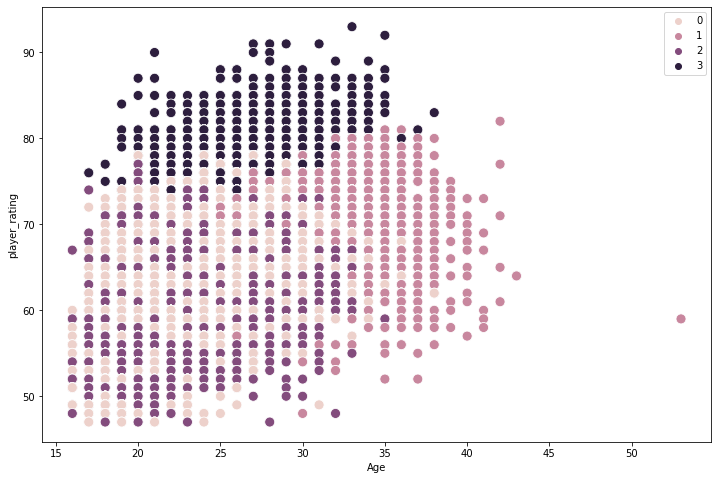

In [27]:
#Plot the clusters for the "player_rating" and "Wages" variable
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=fifa_21_new['age'], y=fifa_21_new['player_rating'], hue=kmeans.labels_, s=100)

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('player_rating') # Label y-axis
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

All the clusters color except black cluster (coded 3) player ratings are below 80, the pink clusters (coded 0) have the oldest players while the black clusters have the highest ratings

In [28]:
fifa_21_new.loc[fifa_21_new['clusters'] == 3, 'cluster'] = 'black'
fifa_21_new.loc[fifa_21_new['clusters'] == 2, 'cluster'] = 'dark puple'
fifa_21_new.loc[fifa_21_new['clusters'] == 1, 'cluster'] = 'purple'
fifa_21_new.loc[fifa_21_new['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\klein\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\klein\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
fifa_21_new.groupby('cluster').agg({'player_rating' : ['mean', 'median'], 'potential' : ['mean', 'median'], 'Wages' : ['mean', 'median'], 
                                   'Market Value Eur' : ['mean', 'median'], 
                                   'age' : ['mean', 'median']})

player_rating         potential                Wages           \
                    mean median       mean median          mean   median   
cluster                                                                    
black          78.522008   78.0  81.599725   81.0  54403.026135  42000.0   
dark puple     61.952818   62.0  70.267063   70.0   2991.770214   2000.0   
pink           63.265391   64.0  71.090271   71.0   3780.231260   2000.0   
purple         68.679346   69.0  69.120360   69.0   8257.625873   5000.0   

           Market Value Eur                    age         
                       mean      median       mean median  
cluster                                                    
black          1.502724e+07  11000000.0  26.099037   26.0  
dark puple     7.519728e+05    425000.0  22.592292   22.0  
pink           1.087944e+06    575000.0  22.803190   22.0  
purple         1.708958e+06    837500.0  30.305770   30.0